In [58]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
import pandas as pd

import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

from sklearn.model_selection import train_test_split
from IPython import display


In [59]:
#!/bin/bash
!curl -L -o ./student-exam-performance-prediction.zip \
    https://www.kaggle.com/api/v1/datasets/download/mrsimple07/student-exam-performance-prediction
!unzip -o ./student-exam-performance-prediction.zip -d .

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100 19784  100 19784    0     0   9823      0  0:00:02  0:00:02 --:--:-- 92000
Archive:  ./student-exam-performance-prediction.zip
  inflating: ./student_exam_data.csv  
  inflating: ./student_exam_data_new.csv  


In [60]:
df = pd.read_csv("./student_exam_data.csv")
df.head()

,Study Hours,Previous Exam Score,Pass/Fail
0,4.370861,81.889703,0
1,9.556429,72.165782,1
2,7.587945,58.571657,0
3,6.387926,88.827701,1
4,2.404168,81.083870,0


In [61]:
X = df.drop("Pass/Fail", axis=1).values
y = df["Pass/Fail"].values

Xc = X - X.min(axis=0)
Xs = Xc.max(axis=0)
Xc = Xc / Xs

x_train, x_test, y_train, y_test = train_test_split(
    Xc, y, test_size=0.2, random_state=42
)


In [62]:
X_train_tensor = torch.FloatTensor(x_train)
y_train_tensor = torch.FloatTensor(y_train).view(-1, 1)

X_test_tensor = torch.FloatTensor(x_test)
y_test_tensor = torch.FloatTensor(y_test).view(-1, 1)

In [63]:
input_dim = X_train_tensor.shape[1]

model = nn.Linear(input_dim, 1)  # 1 neurônio → classe positiva


In [64]:
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)


In [ ]:
nb_epoch = 5000

losses = []
losses_test = []
acc_list = []
acc_test_list = []

for i in range(nb_epoch):

    output = model(X_train_tensor)
    output_test = model(X_test_tensor)

    loss = criterion(output, y_train_tensor)
    loss_test = criterion(output_test, y_test_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    losses_test.append(loss_test.item())

    # Probabilidade → sigmoid
    pred_train = (torch.sigmoid(output) > 0.5).float()
    pred_test = (torch.sigmoid(output_test) > 0.5).float()

    acc_list.append((pred_train == y_train_tensor).float().mean())
    acc_test_list.append((pred_test == y_test_tensor).float().mean())

print("Final loss:", losses[-1])


Final loss: 0.27825143933296204


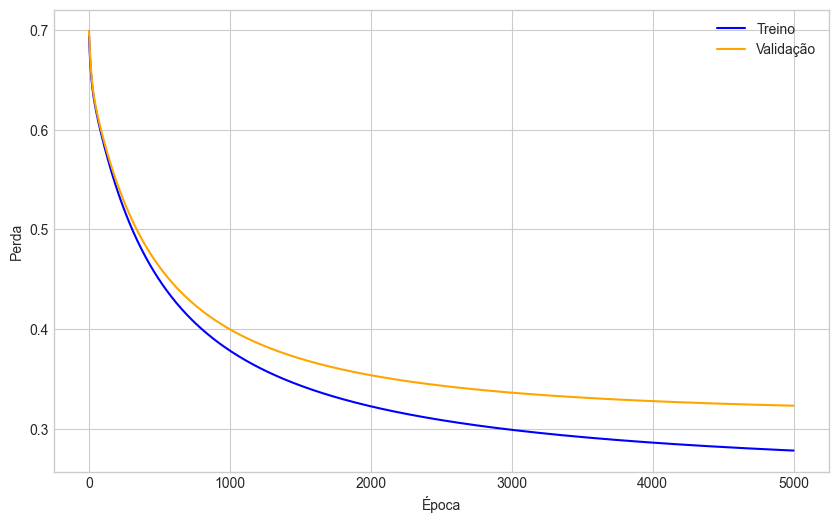

In [66]:
plt.figure(figsize=(10, 6))
plt.plot(range(nb_epoch), losses, label="Treino", color='blue')
plt.plot(range(nb_epoch), losses_test, label="Validação", color='orange')
plt.xlabel("Época")
plt.ylabel("Perda")
plt.legend()
plt.show()


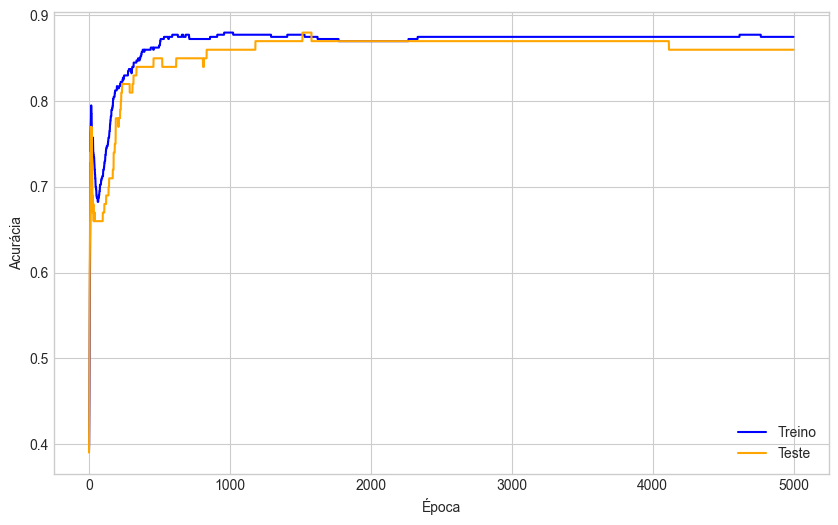

In [67]:
plt.figure(figsize=(10, 6))
plt.plot(range(nb_epoch), acc_list, label="Treino", color='blue')
plt.plot(range(nb_epoch), acc_test_list, label="Teste", color='orange')
plt.xlabel("Época")
plt.ylabel("Acurácia")
plt.legend()
plt.show()


In [68]:
with torch.no_grad():
    logits = model(torch.FloatTensor(Xc))
    y_pred = (torch.sigmoid(logits) > 0.5).int().numpy()


In [69]:
accuracy = (y_pred.reshape(-1) == y).mean()
print("Training Accuracy:", accuracy)


Training Accuracy: 0.872


In [70]:
import pandas as pd
pd.crosstab(y_pred.reshape(-1), y)


col_0,0,1
row_0,,
0,289,37
1,27,147
